In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files into DataFrames
candidates_with_phase = pd.read_csv('candidates_with_phase.csv')
results_2024 = pd.read_csv('results_2024.csv')
results_2024_winners = pd.read_csv('results_2024_winners.csv')

# Display the first few rows of each DataFrame to verify the contents
candidates_with_phase.head(), 
results_2024.head(),
results_2024_winners.head()


,State,PC No,PC Name,Winning Candidate,Winning Party,Runner-up Canddiate,Runner-up Party,Margin Votes,Results Status
0,Andhra Pradesh,7,Amalapuram (SC),G M HARISH (BALAYOGI),Telugu Desam,RAPAKA VARAPRASADA RAO,Yuvajana Sramika Rythu Congress Party,342196,Result Declared
1,Andhra Pradesh,5,Anakapalle,C.M.RAMESH,Bharatiya Janata Party,BUDI MUTYALA NAIDU,Yuvajana Sramika Rythu Congress Party,296530,Result Declared
2,Andhra Pradesh,19,Ananthapur,AMBICA G LAKSHMINARAYANA VALMIKI,Telugu Desam,MALAGUNDLA SANKAR NARAYANA,Yuvajana Sramika Rythu Congress Party,188555,Result Declared
3,Andhra Pradesh,1,Araku (ST),GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,KOTHAPALLI GEETHA,Bharatiya Janata Party,50580,Result Declared
4,Andhra Pradesh,15,Bapatla (SC),KRISHNA PRASAD TENNETI,Telugu Desam,NANDIGAM SURESH BABU,Yuvajana Sramika Rythu Congress Party,208031,Result Declared


In [7]:
# Drop rows with missing values in results_2024_winners DataFrame
results_2024_winners.dropna(subset=['Runner-up Canddiate', 'Runner-up Party'], inplace=True)


In [8]:
# Merge candidates_with_phase with results_2024 on State and Constituency
merged_data = pd.merge(candidates_with_phase, results_2024, how='inner', left_on=['State', 'Constituency'], right_on=['State', 'PC Name'])

# Merge the result with results_2024_winners on State and PC Name
merged_data = pd.merge(merged_data, results_2024_winners, how='inner', left_on=['State', 'Constituency'], right_on=['State', 'PC Name'])

# Display the first few rows of the merged DataFrame to verify the contents
merged_data.head()


,State,Constituency_No,Constituency,Party_x,Candidate Name,Gender,Age,Address,Application Date,Application Status,...,Total Votes,Vote Share,PC No_y,PC Name_y,Winning Candidate,Winning Party,Runner-up Canddiate,Runner-up Party,Margin Votes,Results Status
0,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,V.K. ABDUL AZIZ,male,42,Brindaban,"27th March, 2024",Accepted,...,102436,50.58,1,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,KULDEEP RAI SHARMA,Indian National Congress,24396,Result Declared
1,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,V.K. ABDUL AZIZ,male,42,Brindaban,"27th March, 2024",Accepted,...,78040,38.54,1,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,KULDEEP RAI SHARMA,Indian National Congress,24396,Result Declared
2,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,V.K. ABDUL AZIZ,male,42,Brindaban,"27th March, 2024",Accepted,...,8254,4.08,1,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,KULDEEP RAI SHARMA,Indian National Congress,24396,Result Declared
3,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,V.K. ABDUL AZIZ,male,42,Brindaban,"27th March, 2024",Accepted,...,6017,2.97,1,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,KULDEEP RAI SHARMA,Indian National Congress,24396,Result Declared
4,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,V.K. ABDUL AZIZ,male,42,Brindaban,"27th March, 2024",Accepted,...,2203,1.09,1,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,KULDEEP RAI SHARMA,Indian National Congress,24396,Result Declared


### Distribution of Candidates by Gender


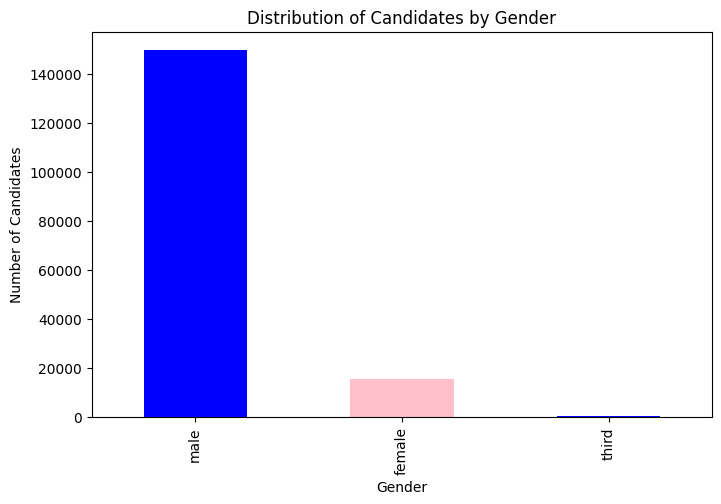

In [10]:
# Gender distribution
gender_distribution = merged_data['Gender'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
gender_distribution.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Number of Candidates')
plt.title('Distribution of Candidates by Gender')
plt.show()


### Distribution of Candidates by Age

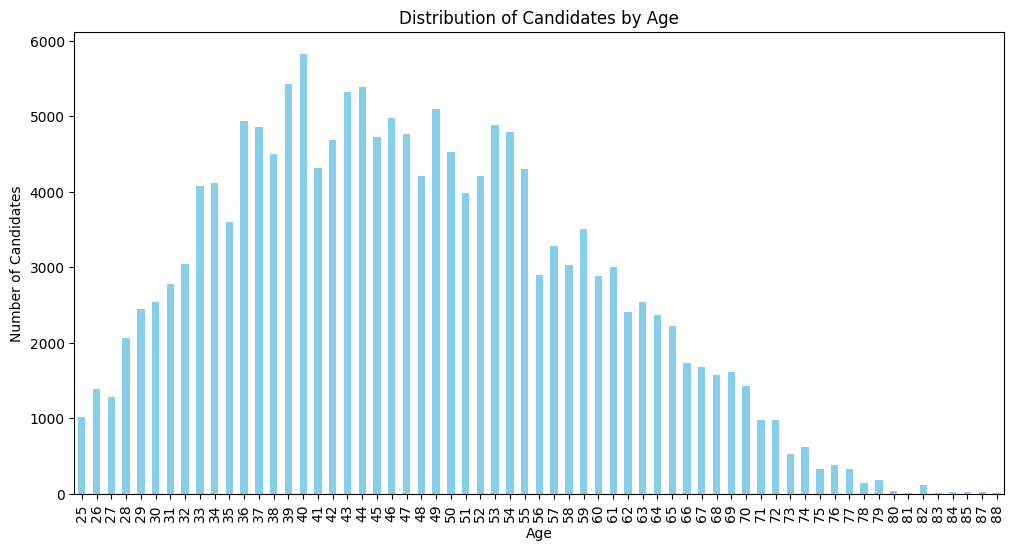

In [11]:
# Age distribution
age_distribution = merged_data['Age'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(12, 6))
age_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Candidates')
plt.title('Distribution of Candidates by Age')
plt.show()


### Distribution of Candidates by Party

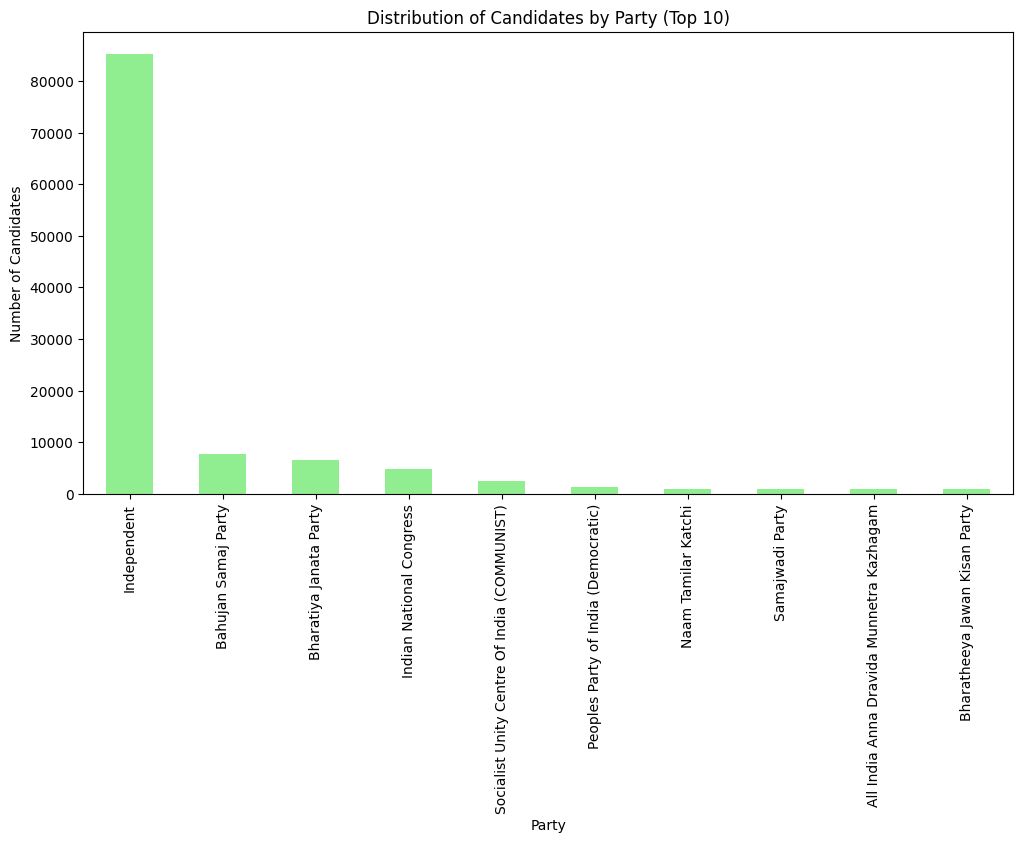

In [15]:
# Party distribution
party_distribution = merged_data['Party_x'].value_counts().head(10)  # Top 10 parties

# Plot the distribution
plt.figure(figsize=(12, 6))
party_distribution.plot(kind='bar', color='lightgreen')
plt.xlabel('Party')
plt.ylabel('Number of Candidates')
plt.title('Distribution of Candidates by Party (Top 10)')
plt.show()


### Election Results Analysis

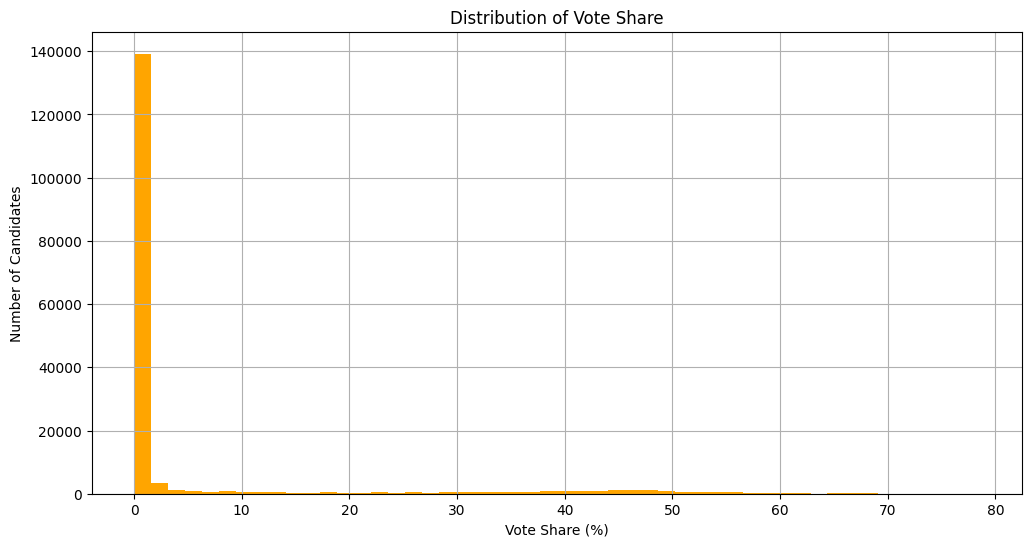

In [19]:
# Vote share distribution
plt.figure(figsize=(12, 6))
merged_data['Vote Share'].hist(bins=50, color='orange')
plt.xlabel('Vote Share (%)')
plt.ylabel('Number of Candidates')
plt.title('Distribution of Vote Share')
plt.show()


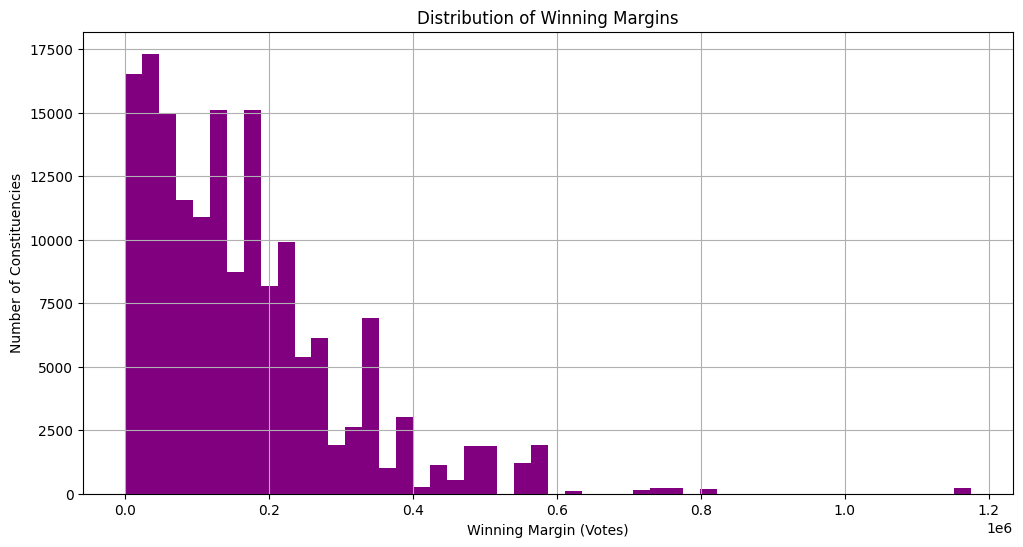

In [33]:
# Winning margins distribution
plt.figure(figsize=(12, 6))
merged_data['Margin Votes'].hist(bins=50, color='purple')
plt.xlabel('Winning Margin (Votes)')
plt.ylabel('Number of Constituencies')
plt.title('Distribution of Winning Margins')
plt.show()


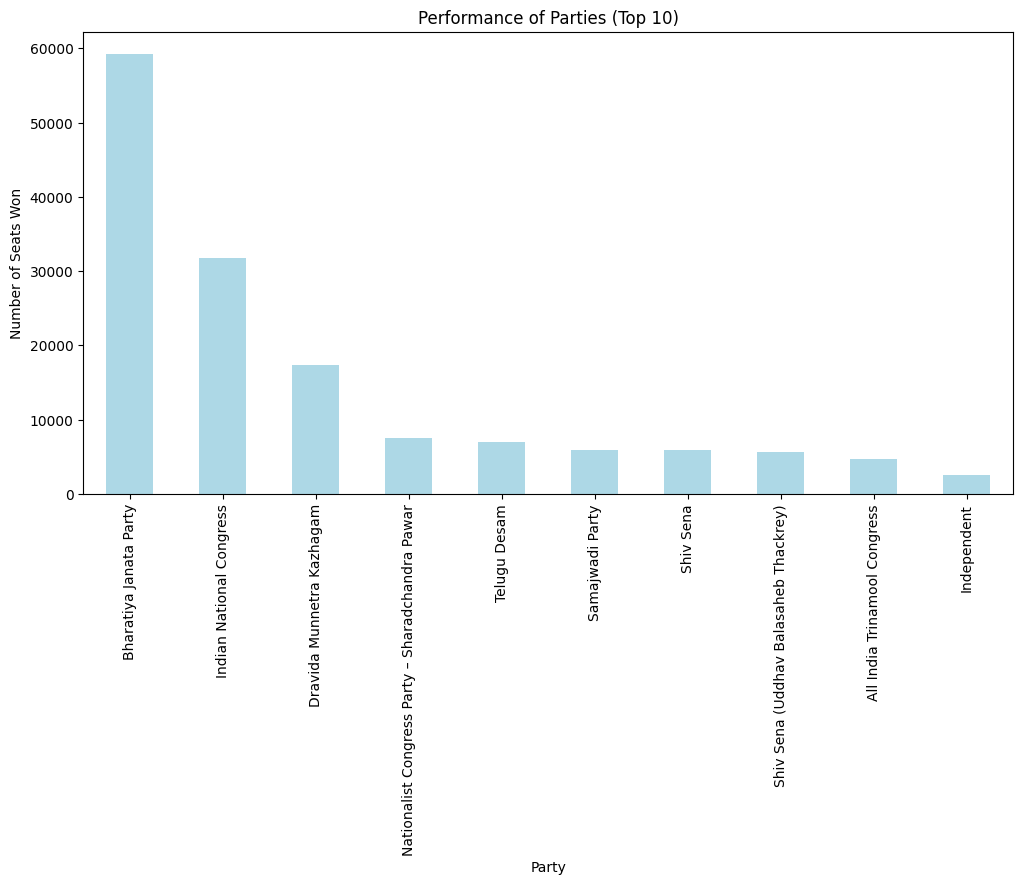

In [22]:
# Performance of top 10 parties
party_performance = merged_data['Winning Party'].value_counts().head(10)

# Plot the performance
plt.figure(figsize=(12, 6))
party_performance.plot(kind='bar', color='lightblue')
plt.xlabel('Party')
plt.ylabel('Number of Seats Won')
plt.title('Performance of Parties (Top 10)')
plt.show()


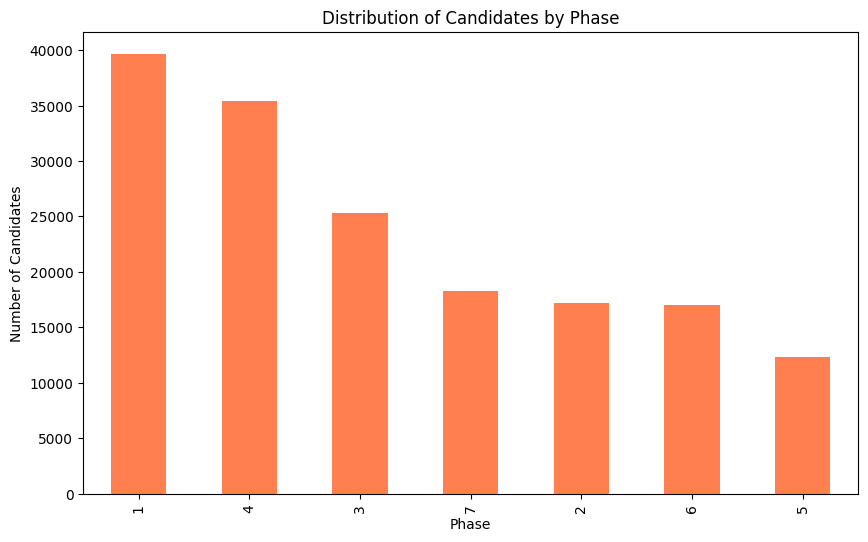

In [24]:

# Phase distribution
phase_distribution = merged_data['Phase'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
phase_distribution.plot(kind='bar', color='coral')
plt.xlabel('Phase')
plt.ylabel('Number of Candidates')
plt.title('Distribution of Candidates by Phase')
plt.show()


In [26]:
# Top 10 candidates by vote share
top_candidates_vote_share = merged_data.nlargest(10, 'Vote Share')[['Candidate Name', 'Party_x', 'Vote Share']]

# Display the top candidates by vote share
top_candidates_vote_share



,Candidate Name,Party_x,Vote Share
58419,ADVOCATE PANKAJ GUPTE,Independent,78.54
58434,DESH BHAKT ANKIT GUPTA,Independent,78.54
58449,SANJAY S/O LAKSHMAN SOLANKI,Bahujan Samaj Party,78.54
58464,ENG. ARJUN PARIHAR,Independent,78.54
58479,SHANKAR LALWANI,Bharatiya Janata Party,78.54
58494,MUDIT CHAURASIA,Independent,78.54
58509,ABHAY JAIN,Independent,78.54
58524,PAWAN KUMAR,Akhil Bhartiya Parivar Party,78.54
58539,AYAZ ALI,Independent,78.54
58554,BASANT GEHLOT,Jan Sangh Party,78.54


In [32]:
# Top Candidates by Vote Share
# Convert 'Total Votes' to numeric type
merged_data['Total Votes'] = pd.to_numeric(merged_data['Total Votes'], errors='coerce')

# Handle any potential NaN values after conversion
merged_data['Total Votes'].fillna(0, inplace=True)

# Top 10 candidates by total votes
top_candidates_total_votes = merged_data.nlargest(10, 'Total Votes')[['Candidate Name', 'Party_x', 'Total Votes']]

# Display the top candidates by total votes
top_candidates_total_votes

,Candidate Name,Party_x,Total Votes
58419,ADVOCATE PANKAJ GUPTE,Independent,1226751
58434,DESH BHAKT ANKIT GUPTA,Independent,1226751
58449,SANJAY S/O LAKSHMAN SOLANKI,Bahujan Samaj Party,1226751
58464,ENG. ARJUN PARIHAR,Independent,1226751
58479,SHANKAR LALWANI,Bharatiya Janata Party,1226751
58494,MUDIT CHAURASIA,Independent,1226751
58509,ABHAY JAIN,Independent,1226751
58524,PAWAN KUMAR,Akhil Bhartiya Parivar Party,1226751
58539,AYAZ ALI,Independent,1226751
58554,BASANT GEHLOT,Jan Sangh Party,1226751


In [30]:
# Top Candidates by Total Votes
# Convert 'Margin Votes' to numeric type
merged_data['Margin Votes'] = pd.to_numeric(merged_data['Margin Votes'], errors='coerce')

# Handle any potential NaN values after conversion
merged_data['Margin Votes'].fillna(0, inplace=True)

# Constituencies with the highest winning margins
highest_margin_constituencies = merged_data.nlargest(10, 'Margin Votes')[['Constituency', 'Winning Candidate', 'Winning Party', 'Margin Votes']]

# Constituencies with the lowest winning margins
lowest_margin_constituencies = merged_data.nsmallest(10, 'Margin Votes')[['Constituency', 'Winning Candidate', 'Winning Party', 'Margin Votes']]

# Display the highest and lowest margin constituencies
highest_margin_constituencies, 
lowest_margin_constituencies

,Constituency,Winning Candidate,Winning Party,Margin Votes
70660,Mumbai North West,RAVINDRA DATTARAM WAIKAR,Shiv Sena,48
70661,Mumbai North West,RAVINDRA DATTARAM WAIKAR,Shiv Sena,48
70662,Mumbai North West,RAVINDRA DATTARAM WAIKAR,Shiv Sena,48
70663,Mumbai North West,RAVINDRA DATTARAM WAIKAR,Shiv Sena,48
70664,Mumbai North West,RAVINDRA DATTARAM WAIKAR,Shiv Sena,48
70665,Mumbai North West,RAVINDRA DATTARAM WAIKAR,Shiv Sena,48
70666,Mumbai North West,RAVINDRA DATTARAM WAIKAR,Shiv Sena,48
70667,Mumbai North West,RAVINDRA DATTARAM WAIKAR,Shiv Sena,48
70668,Mumbai North West,RAVINDRA DATTARAM WAIKAR,Shiv Sena,48
70669,Mumbai North West,RAVINDRA DATTARAM WAIKAR,Shiv Sena,48


In [35]:
# Correlation between age and total votes
age_total_votes_correlation = merged_data[['Age', 'Total Votes']].corr()

# Correlation between gender and winning margins
# (For gender, we need to encode 'male' as 1 and 'female' as 0)
merged_data['Gender_Encoded'] = merged_data['Gender'].apply(lambda x: 1 if x.lower() == 'male' else 0)
gender_margin_correlation = merged_data[['Gender_Encoded', 'Margin Votes']].corr()

age_total_votes_correlation
gender_margin_correlation


,Gender_Encoded,Margin Votes
Gender_Encoded,1.000000,0.003345
Margin Votes,0.003345,1.000000


In [37]:
# Correlation between Total Votes and Margin Votes
total_votes_margin_votes_corr = merged_data[['Total Votes', 'Margin Votes']].corr().iloc[0, 1]
# Display the correlation
total_votes_margin_votes_corr


0.014203447307643224

In [38]:
# Correlation between Age and Vote Share
age_vote_share_corr = merged_data[['Age', 'Vote Share']].corr().iloc[0, 1]
# Display the correlation
age_vote_share_corr


0.01551823846629456